In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,log_loss,hinge_loss,roc_auc_score,roc_curve,\
                            confusion_matrix,accuracy_score,precision_score,f1_score,recall_score


from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,\
                             RandomForestClassifier,StackingClassifier,VotingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
churn = pd.read_csv("Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
num_data=churn.select_dtypes(include=np.number)
num_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# outliers in CreditScore , Age , NumOfProducts 

num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
cat_data=churn.select_dtypes(include="object")
cat_data.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [7]:
cat_data.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
# univariate and bivariate

Male      5457
Female    4543
Name: Gender, dtype: int64

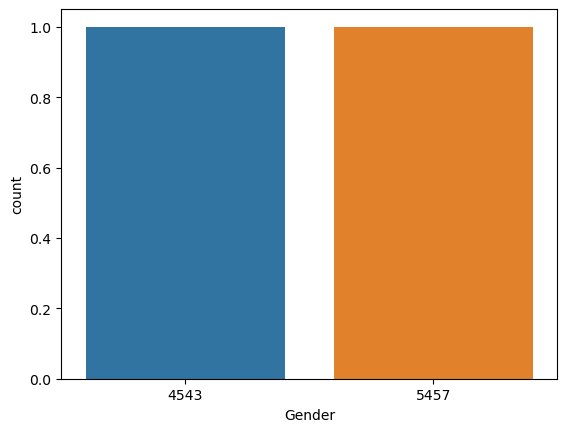

In [9]:
sns.countplot(x=cat_data["Gender"].value_counts())
cat_data["Gender"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

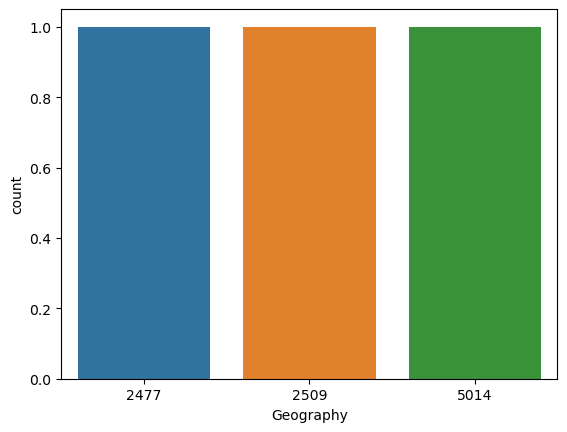

In [10]:
sns.countplot(x=cat_data["Geography"].value_counts())
cat_data["Geography"].value_counts()

In [11]:
num_data.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

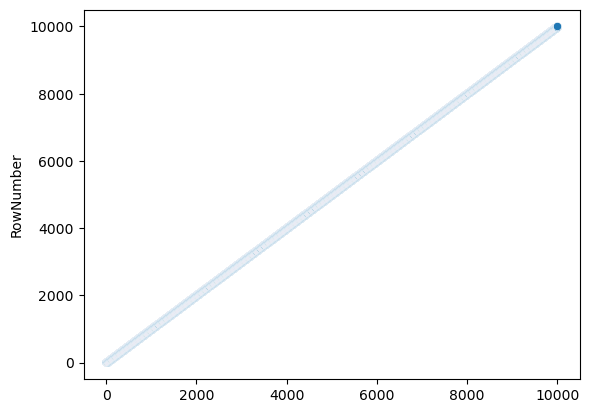

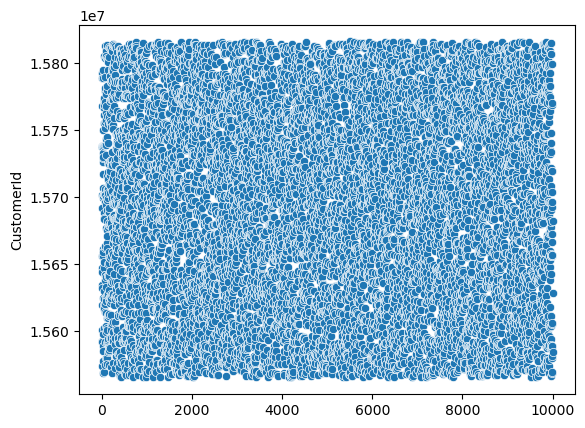

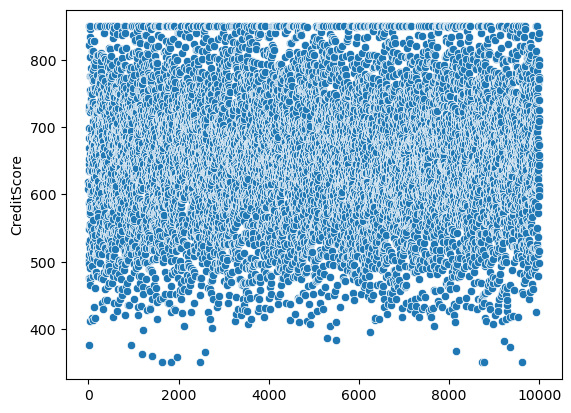

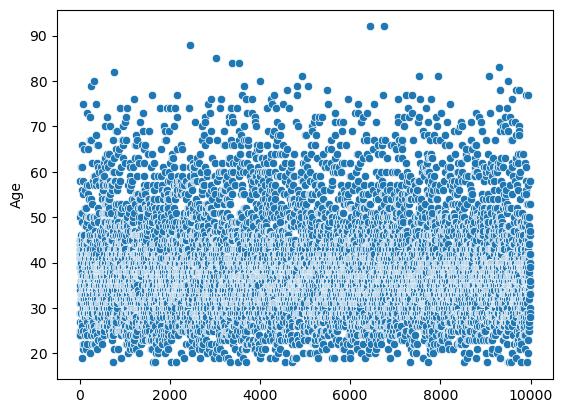

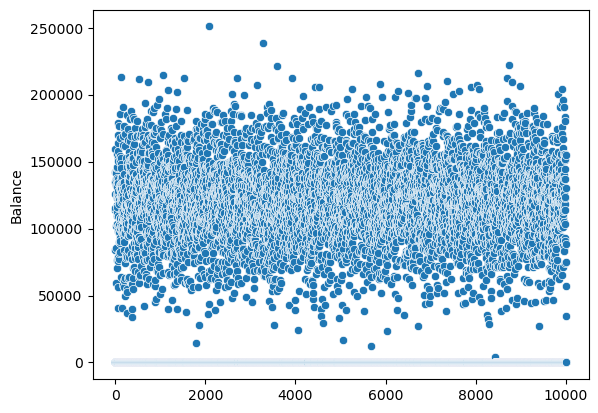

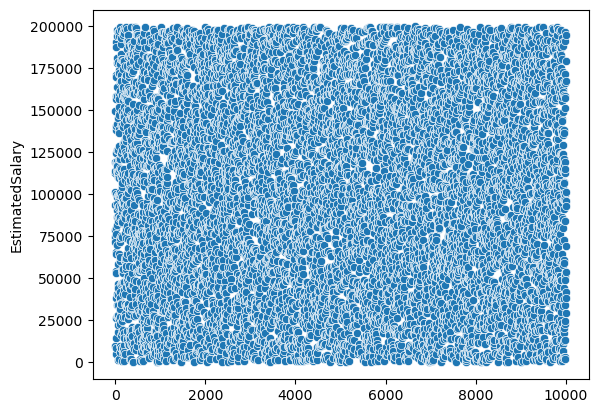

In [12]:
for i in num_data.drop([ "Tenure" , "NumOfProducts" , "HasCrCard" , "IsActiveMember", "Exited"],axis=1).columns:
    sns.scatterplot(num_data[i])
    plt.show()
    
# [ "Tenure" , "NumOfProducts" , "HasCrCard" , "IsActiveMember"] are the encoded data
# "Exited" is the target variable

# CreditScore, 'Age', 'Balance', 'EstimatedSalary' are scatterd well

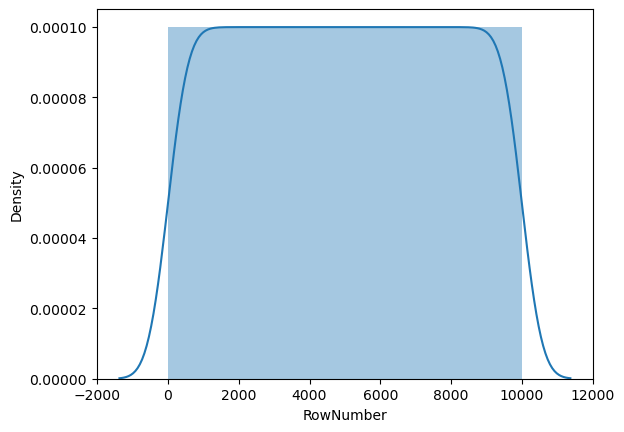

0.0


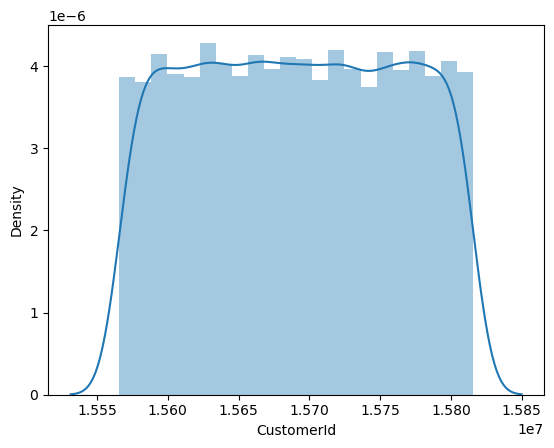

0.001149145900554239


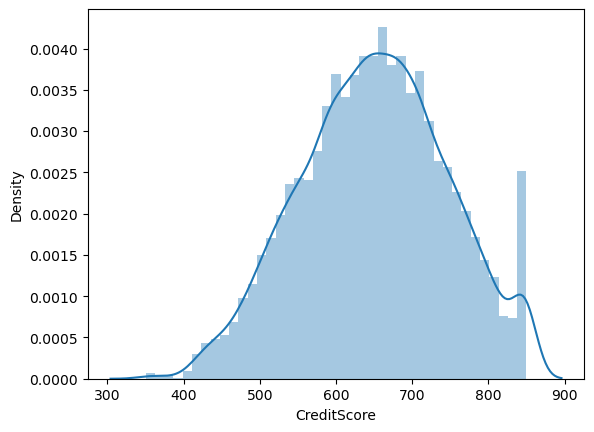

-0.07160660820092675


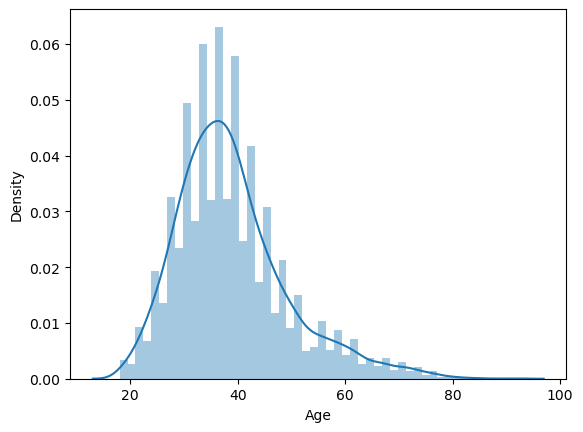

1.0113202630234552


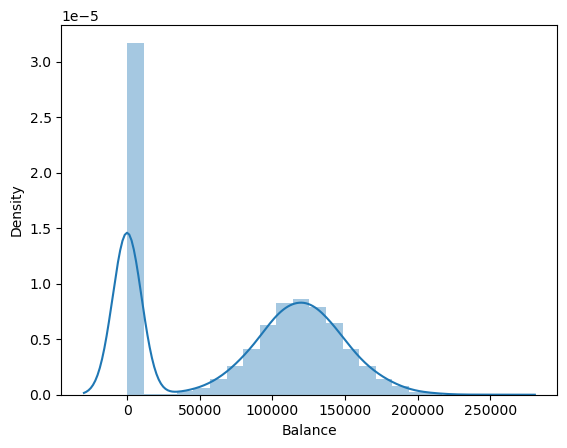

-0.14110871094154384


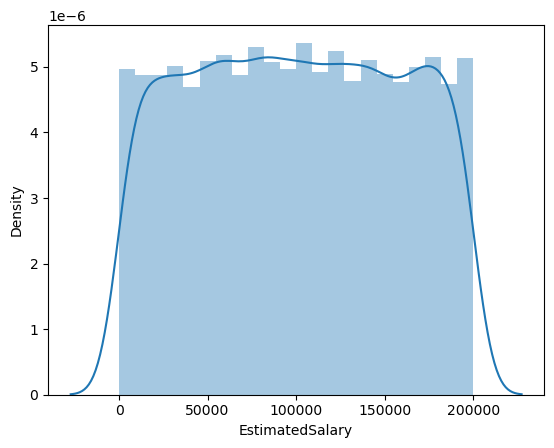

0.0020853576615585162


In [13]:
for i in num_data.drop([ "Tenure" , "NumOfProducts" , "HasCrCard" , "IsActiveMember", "Exited"],axis=1).columns:
    sns.distplot(num_data[i])
    plt.show()
    print(num_data[i].skew())
# CreditScore is near to normal distribution (left skewed)

# Age is right skewed

# Balance have a peak at value 0

# EstimatedSalary 

<Axes: xlabel='Balance', ylabel='Gender'>

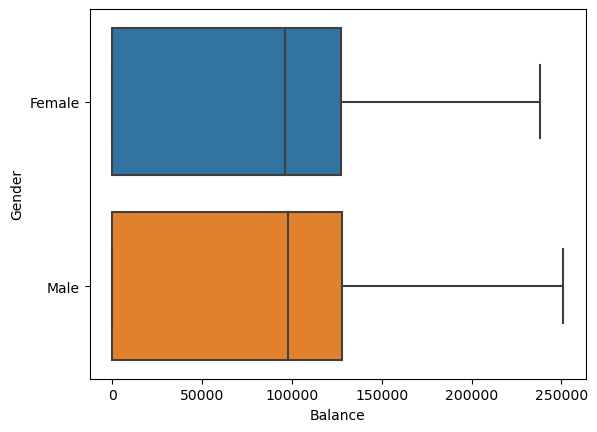

In [14]:
sns.boxplot(x=churn["Balance"],y=churn["Gender"])

<Axes: xlabel='Balance', ylabel='Geography'>

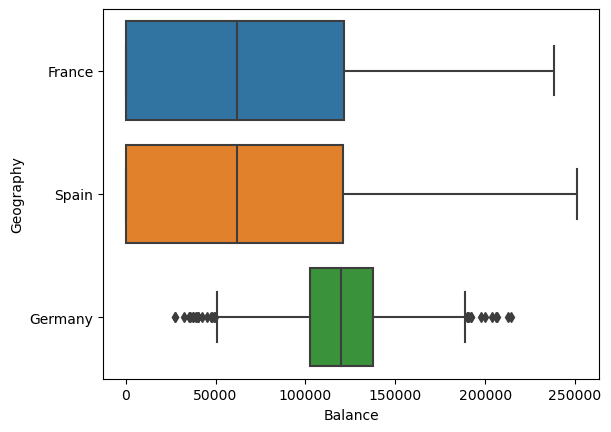

In [15]:
sns.boxplot(x=churn["Balance"],y=churn["Geography"])

<Axes: xlabel='EstimatedSalary', ylabel='Gender'>

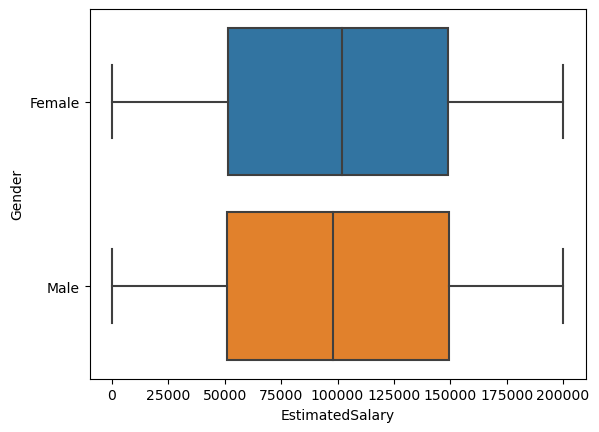

In [16]:
sns.boxplot(x=churn["EstimatedSalary"],y=churn["Gender"])

<Axes: xlabel='EstimatedSalary', ylabel='Geography'>

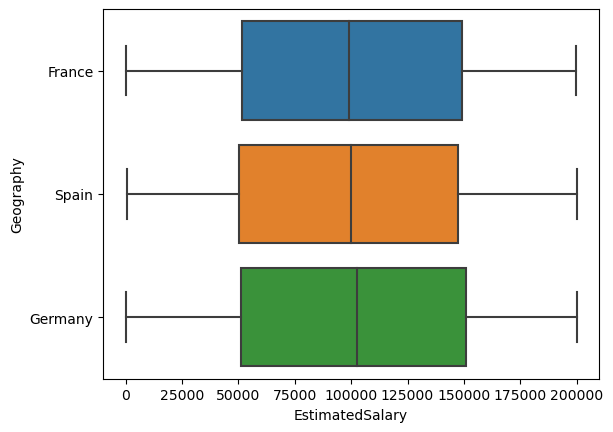

In [17]:
sns.boxplot(x=churn["EstimatedSalary"],y=churn["Geography"])

<Axes: xlabel='CreditScore', ylabel='Geography'>

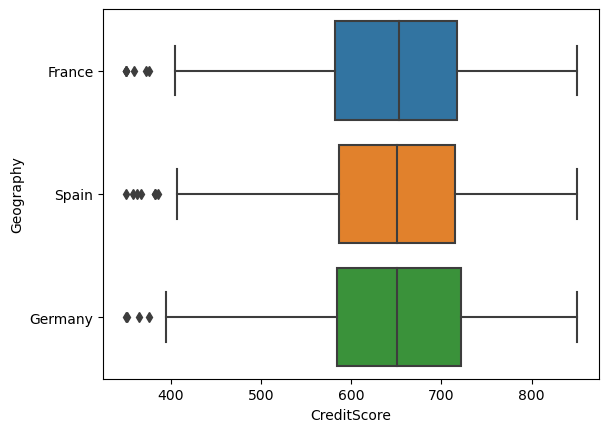

In [18]:
sns.boxplot(x=churn["CreditScore"],y=churn["Geography"])

<Axes: xlabel='CreditScore', ylabel='Geography'>

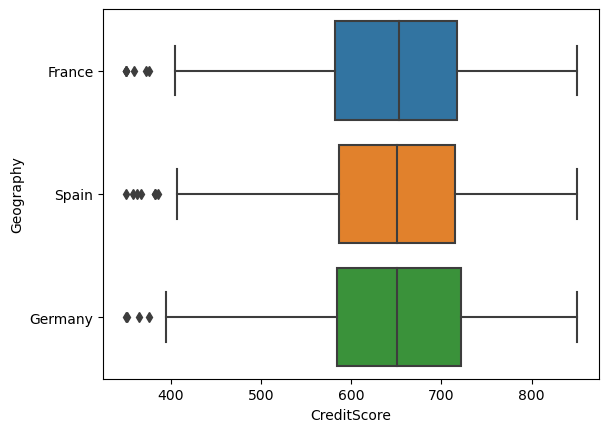

In [19]:
sns.boxplot(x=churn["CreditScore"],y=churn["Geography"])

<Axes: xlabel='Age', ylabel='Balance'>

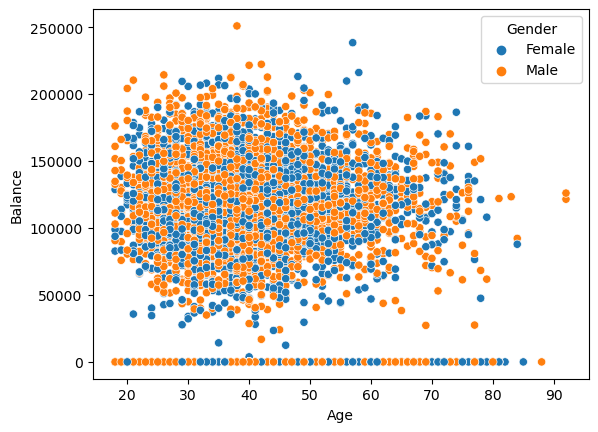

In [20]:
sns.scatterplot(x=churn["Age"],y=churn["Balance"],hue=churn["Gender"])

<Axes: xlabel='Age', ylabel='CreditScore'>

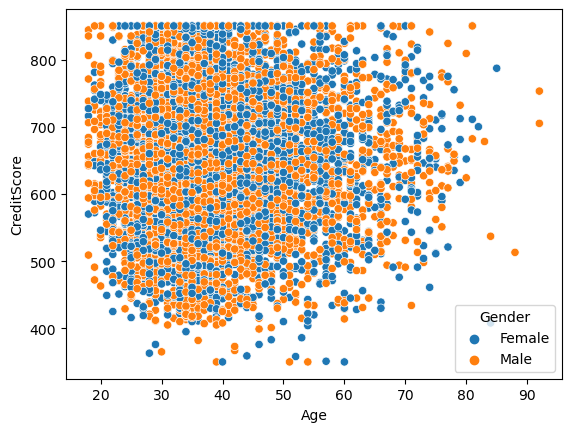

In [21]:
sns.scatterplot(x=churn["Age"],y=churn["CreditScore"],hue=churn["Gender"])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

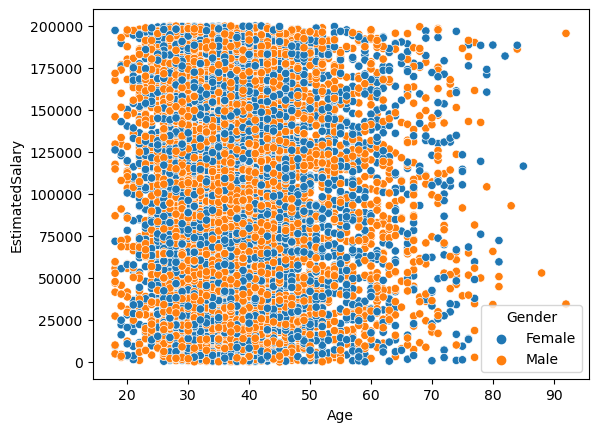

In [22]:
sns.scatterplot(x=churn["Age"],y=churn["EstimatedSalary"],hue=churn["Gender"])

In [24]:
# pre-processing

In [25]:
# RowNumber , CustomerId can be droped
num_data.drop(["RowNumber","CustomerId"],axis=1,inplace=True)
num_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

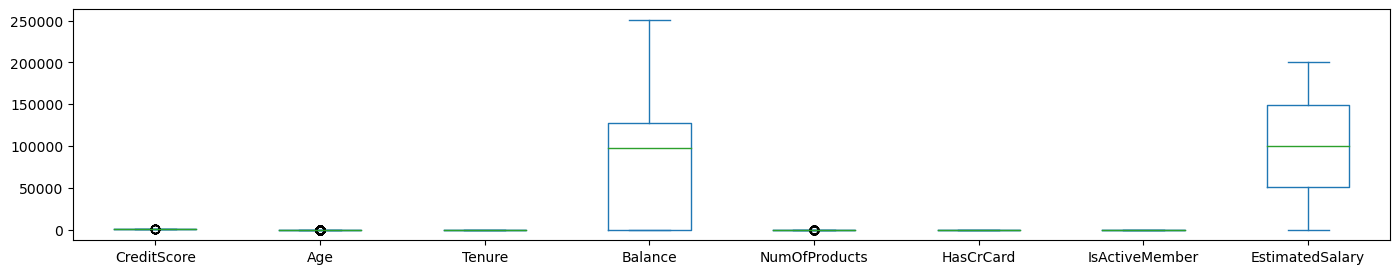

In [26]:
num_data.drop(["Exited"],axis=1).plot(kind="box",figsize=(17,3))

In [27]:
# Surname can be droped

cat_data.drop("Surname",axis=1,inplace=True)
cat_data.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [28]:
final_data = pd.concat([num_data,cat_data],axis=1)
final_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,France,Female
1,608,41,1,83807.86,1,0,1,112542.58,0,Spain,Female
2,502,42,8,159660.80,3,1,0,113931.57,1,France,Female
3,699,39,1,0.00,2,0,0,93826.63,0,France,Female
4,850,43,2,125510.82,1,1,1,79084.10,0,Spain,Female


In [29]:
# train_test_split
x=final_data.drop("Exited",axis=1)
y=final_data[["Exited"]]

xtrain , xtest , ytrain , ytest = train_test_split(x,y,random_state=100,train_size=0.8)

xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((8000, 10), (2000, 10), (8000, 1), (2000, 1))

In [30]:
# frequency encoder

geo_encode = xtrain["Geography"].value_counts().to_dict()
geo_encode

{'France': 3997, 'Germany': 2016, 'Spain': 1987}

In [31]:
xtest["Geography"] = xtest["Geography"].map(geo_encode)

xtrain["Geography"] = xtrain["Geography"].map(geo_encode)

In [32]:
xtest["Gender"] = pd.get_dummies(xtest["Gender"],drop_first=True)
xtrain["Gender"] = pd.get_dummies(xtrain["Gender"],drop_first=True)

In [33]:
xtest.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
8018,632,23,3,122478.51,1,1,0,147230.77,2016,1
9225,594,32,4,120074.97,2,1,1,162961.79,2016,0
3854,687,33,9,135962.40,2,1,0,121747.96,2016,1
2029,520,33,4,156297.58,2,1,1,166102.61,3997,1
3539,667,42,6,0.00,1,1,0,88890.05,3997,1


In [34]:
xtrain.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
8369,684,37,1,126817.13,2,1,1,29995.83,2016,1
9722,679,36,3,0.00,2,1,1,2243.41,3997,0
6950,652,38,6,123081.84,2,1,1,188657.97,1987,0
1919,618,56,7,0.00,1,1,1,142400.27,3997,1
5713,537,47,10,0.00,2,0,1,25482.62,3997,1


In [35]:
# predictive model

accu=[]
recl=[]
prec=[]
f1=[]
model_name=[]
# df_score=pd.DataFrame()
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m= model
    m.fit(xtrain,ytrain)
    pred_h=m.predict(xtest)
    pred_s=m.predict_proba(xtest)[:,1]
    print('classification_report',classification_report(ytest,pred_h))
    
    fpr,tpr,thre=roc_curve(ytest,pred_s)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.plot(fpr,tpr)
    plt.show()

    model_name.append(str(m))
    accu.append(accuracy_score(ytest,pred_h))
    recl.append(recall_score(ytest,pred_h))
    prec.append(precision_score(ytest,pred_h))
    f1.append(f1_score(ytest,pred_h))
    global df_score
    df_score=pd.DataFrame({'Model':model_name,'Accuracy':accu,
                              'Recall':recl,'Precision':prec,'F1 Score':f1})
    return m

classification_report               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1588
           1       0.36      0.08      0.13       412

    accuracy                           0.78      2000
   macro avg       0.58      0.52      0.50      2000
weighted avg       0.71      0.78      0.72      2000



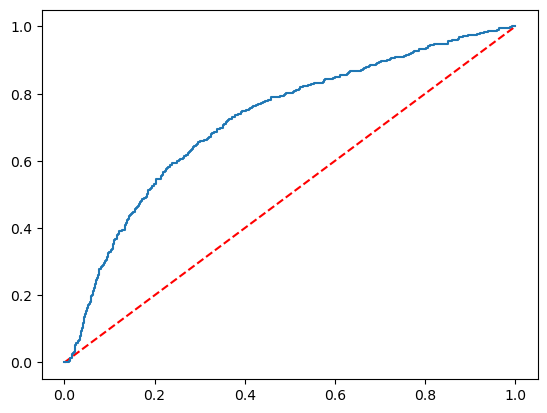

GaussianNB()

In [36]:
# GaussianNB

model_validation(GaussianNB(),xtrain,ytrain,xtest,ytest)

In [37]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,GaussianNB(),0.781,0.082524,0.361702,0.134387


classification_report               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1588
           1       0.78      0.42      0.55       412

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



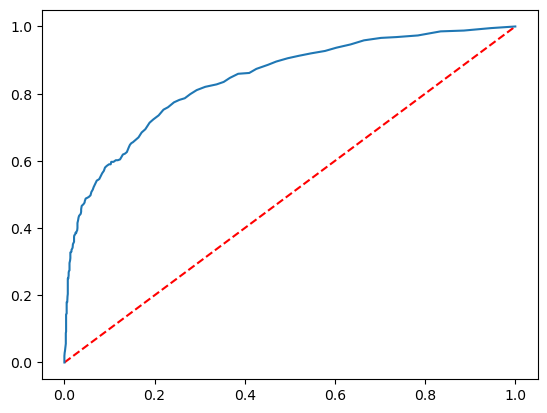

In [38]:
rf=model_validation(RandomForestClassifier(n_estimators=150),xtrain,ytrain,xtest,ytest)

In [39]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,GaussianNB(),0.781,0.082524,0.361702,0.134387
1,RandomForestClassifier(n_estimators=150),0.857,0.422330,0.783784,0.548896


classification_report               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1588
           1       0.74      0.46      0.57       412

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



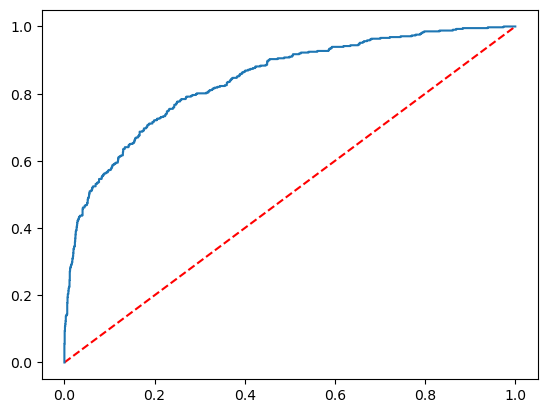

,Model,Accuracy,Recall,Precision,F1 Score
0,GaussianNB(),0.781,0.082524,0.361702,0.134387
1,RandomForestClassifier(n_estimators=150),0.857,0.422330,0.783784,0.548896
2,AdaBoostClassifier(n_estimators=150),0.856,0.458738,0.744094,0.567568


In [40]:
# adaboost
ada= AdaBoostClassifier(n_estimators=150)
model_validation(ada,xtrain,ytrain,xtest,ytest)
df_score



classification_report               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1588
           1       0.77      0.44      0.56       412

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



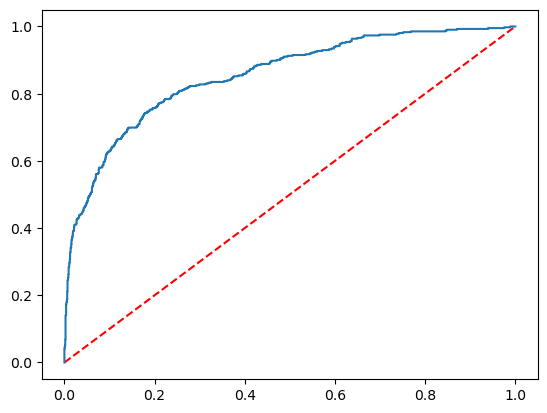

,Model,Accuracy,Recall,Precision,F1 Score
0,GaussianNB(),0.7810,0.082524,0.361702,0.134387
1,RandomForestClassifier(n_estimators=150),0.8570,0.422330,0.783784,0.548896
2,AdaBoostClassifier(n_estimators=150),0.8560,0.458738,0.744094,0.567568
3,GradientBoostingClassifier(n_estimators=150),0.8575,0.436893,0.772532,0.558140


In [41]:
gbc = GradientBoostingClassifier(n_estimators=150)
model_validation(gbc,xtrain,ytrain,xtest,ytest)
df_score



classification_report               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1588
           1       0.67      0.45      0.54       412

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



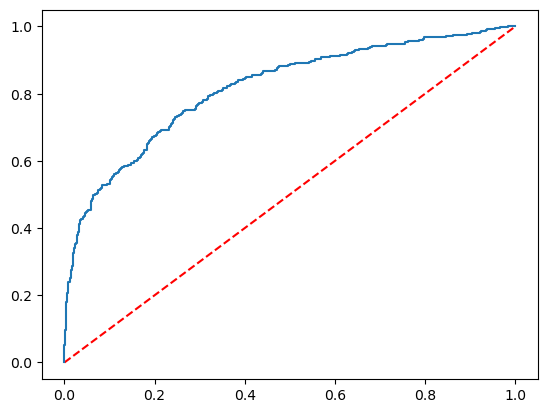

,Model,Accuracy,Recall,Precision,F1 Score
0,GaussianNB(),0.7810,0.082524,0.361702,0.134387
1,RandomForestClassifier(n_estimators=150),0.8570,0.422330,0.783784,0.548896
2,AdaBoostClassifier(n_estimators=150),0.8560,0.458738,0.744094,0.567568
3,GradientBoostingClassifier(n_estimators=150),0.8575,0.436893,0.772532,0.558140
4,"XGBClassifier(base_score=None, booster=None, c...",0.8420,0.453883,0.672662,0.542029


In [42]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=150,max_dept=7)

model_validation(xgb,xtrain,ytrain,xtest,ytest)
df_score

classification_report               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1588
           1       0.74      0.41      0.52       412

    accuracy                           0.85      2000
   macro avg       0.80      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000



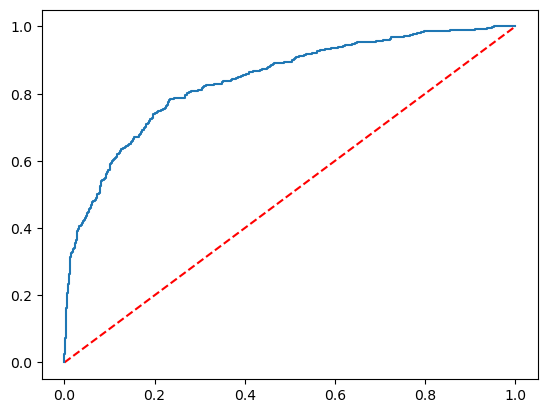

VotingClassifier(estimators=[('DT', DecisionTreeClassifier(max_depth=8)),
                             ('RF',
                              RandomForestClassifier(max_depth=13,
                                                     n_estimators=150)),
                             ('ADABoost', AdaBoostClassifier(n_estimators=200)),
                             ('GB',
                              GradientBoostingClassifier(max_depth=10,
                                                         n_estimators=150))],
                 voting='soft')

In [43]:
#Voting

base_models = [('DT',DecisionTreeClassifier(max_depth=8)),
              ('RF',RandomForestClassifier(n_estimators=150,max_depth=13)),
              ('ADABoost',AdaBoostClassifier(n_estimators=200)),
              ('GB',GradientBoostingClassifier(n_estimators=150,max_depth=10))] 
model_validation(VotingClassifier(estimators=base_models,voting = 'soft'),
                         xtrain,ytrain,xtest,ytest)


In [44]:
df_score

,Model,Accuracy,Recall,Precision,F1 Score
0,GaussianNB(),0.7810,0.082524,0.361702,0.134387
1,RandomForestClassifier(n_estimators=150),0.8570,0.422330,0.783784,0.548896
2,AdaBoostClassifier(n_estimators=150),0.8560,0.458738,0.744094,0.567568
3,GradientBoostingClassifier(n_estimators=150),0.8575,0.436893,0.772532,0.558140
4,"XGBClassifier(base_score=None, booster=None, c...",0.8420,0.453883,0.672662,0.542029
5,"VotingClassifier(estimators=[('DT', DecisionTr...",0.8485,0.405340,0.742222,0.524333


classification_report               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1588
           1       0.65      0.44      0.52       412

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.71      2000
weighted avg       0.82      0.84      0.82      2000



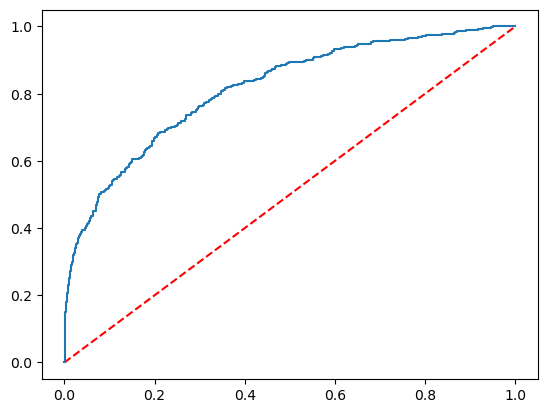

,Model,Accuracy,Recall,Precision,F1 Score
0,GaussianNB(),0.7810,0.082524,0.361702,0.134387
1,RandomForestClassifier(n_estimators=150),0.8570,0.422330,0.783784,0.548896
2,AdaBoostClassifier(n_estimators=150),0.8560,0.458738,0.744094,0.567568
3,GradientBoostingClassifier(n_estimators=150),0.8575,0.436893,0.772532,0.558140
4,"XGBClassifier(base_score=None, booster=None, c...",0.8420,0.453883,0.672662,0.542029
5,"VotingClassifier(estimators=[('DT', DecisionTr...",0.8485,0.405340,0.742222,0.524333
6,"StackingClassifier(estimators=[('DT', Decision...",0.8365,0.436893,0.654545,0.524017


In [45]:
# staking

#Voting

base_models = [('DT',DecisionTreeClassifier(max_depth=8)),
              ('RF',RandomForestClassifier(n_estimators=150,max_depth=13)),
              ('ADABoost',AdaBoostClassifier(n_estimators=200)),
              ('GB',GradientBoostingClassifier(n_estimators=150,max_depth=10))] 
model_validation(StackingClassifier(estimators=base_models,
                 final_estimator=XGBClassifier(n_estimators=150,max_depth=10))
                 ,xtrain,ytrain,xtest,ytest)
df_score

In [46]:
# model fine tuning

from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator=XGBClassifier(), k_features="best" ,forward=False, cv=10,scoring="recall")

sfs.fit(xtrain,ytrain)

SequentialFeatureSelector(cv=10,
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          forward=False, k_features=(1, 10), scoring='recall')

In [47]:
sfs.k_feature_names_

('Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography', 'Gender')

In [49]:
x1=['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography', 'Gender']

In [50]:
param={'n_estimators':[100,150,200,300,350],
     'gamma':[0,1,2,3],
     'max_depth':[7,10,13,16,19]}

grid = GridSearchCV(estimator=XGBClassifier(),param_grid=param,scoring="recall",n_jobs=-1,cv=10,verbose=1)
grid.fit(xtrain[x1],ytrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 1, 2, 3],
                         'max_depth': [7, 10, 13, 16, 19],
                         'n_estimators': [100, 150, 200, 300, 350]},
             scoring='recall', verbose=1)

In [51]:
grid.best_params_

{'gamma': 0, 'max_depth': 10, 'n_estimators': 200}

In [52]:
grid.best_score_

0.5255131409528138

classification_report               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1588
           1       0.62      0.47      0.54       412

    accuracy                           0.83      2000
   macro avg       0.75      0.70      0.72      2000
weighted avg       0.82      0.83      0.82      2000



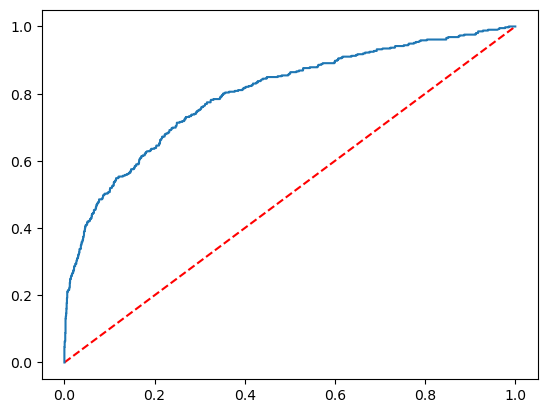

,Model,Accuracy,Recall,Precision,F1 Score
0,GaussianNB(),0.7810,0.082524,0.361702,0.134387
1,RandomForestClassifier(n_estimators=150),0.8570,0.422330,0.783784,0.548896
2,AdaBoostClassifier(n_estimators=150),0.8560,0.458738,0.744094,0.567568
3,GradientBoostingClassifier(n_estimators=150),0.8575,0.436893,0.772532,0.558140
4,"XGBClassifier(base_score=None, booster=None, c...",0.8420,0.453883,0.672662,0.542029
5,"VotingClassifier(estimators=[('DT', DecisionTr...",0.8485,0.405340,0.742222,0.524333
6,"StackingClassifier(estimators=[('DT', Decision...",0.8365,0.436893,0.654545,0.524017
7,"XGBClassifier(base_score=None, booster=None, c...",0.8330,0.473301,0.625000,0.538674


In [53]:
xgb=XGBClassifier(**grid.best_params_)

final_model=model_validation(xgb,xtrain[x1],ytrain,xtest[x1],ytest)
df_score

In [54]:
# 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography', 'Gender'
final_model.predict([[67, 4522, 5, 1,2016 ,1]])


array([0])

In [55]:
final_model.predict([[37, 60000, 5, 0,3997 ,0]])


array([1])

In [57]:
### SAVE The Fitted Model

import pickle

with open('Final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)